In [10]:
import pandas as pd

# Define the file path
file_path = r"c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data\cleaned_census_data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Check basic information about the DataFrame
print(df.info())



   mil pop  unemployment %  mean income  median income  vacant housing units  \
0     13.0            10.1      19689.0        12927.0                1092.0   
1     38.0            33.6      17253.0        11870.0                2440.0   
2    143.0             6.5      51519.0        34253.0                8713.0   
3      0.0            20.5      33712.0        26250.0                 802.0   
4    759.0            13.1      52802.0        43311.0               17653.0   

   rental vacany rate  % below poverty line  median house value  \
0                 3.9                  54.3             81300.0   
1                 5.2                  59.0             74900.0   
2                14.2                  16.6            161400.0   
3                16.9                  25.5             58500.0   
4                17.2                  13.6            127800.0   

                             NAME  state  county        county_name  \
0  Comerío Municipio, Puerto Rico     72     

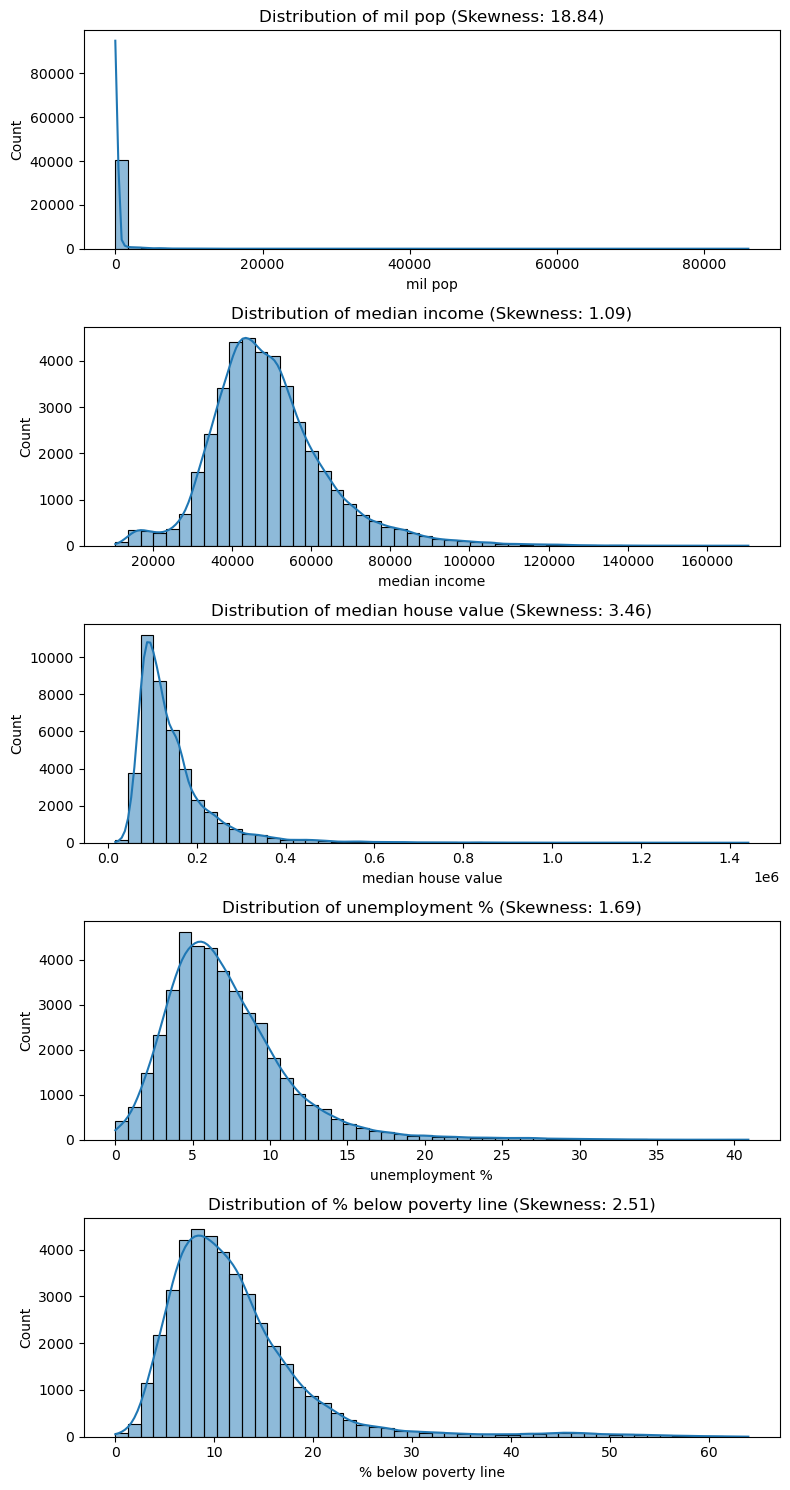

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for analysis
numeric_cols = ["mil pop", "median income", "median house value", "unemployment %", "% below poverty line"]

# Compute skewness for each numeric feature
skewness = df[numeric_cols].skew()

# Plot distributions before transformation
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 15))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} (Skewness: {skewness[col]:.2f})")

plt.tight_layout()
plt.show()




## Based on the distributions and skewness values:

### Military Population (mil pop) is highly skewed (Skewness: 18.84)

Most values are near zero, but a few counties have very large values.
Log transformation is required to normalize the distribution.

### Median Income (median income) is slightly right-skewed (Skewness: 1.09)

The distribution is close to normal but slightly skewed.
No transformation is necessary at this stage.

### Median House Value (median house value) is moderately skewed (Skewness: 3.46)

The distribution is right-skewed, meaning there are a few counties with very high house values.
Log transformation is recommended to reduce the effect of extreme values.

### Unemployment Rate (unemployment %) is skewed (Skewness: 1.69)

The majority of values are low, but a few have very high unemployment.
Possible transformation needed, but should be checked after log-scaling major features.

### % Below Poverty Line (% below poverty line) is skewed (Skewness: 2.51)

The majority of counties have lower poverty rates, with a few extreme cases.
Log transformation could help normalize this feature.

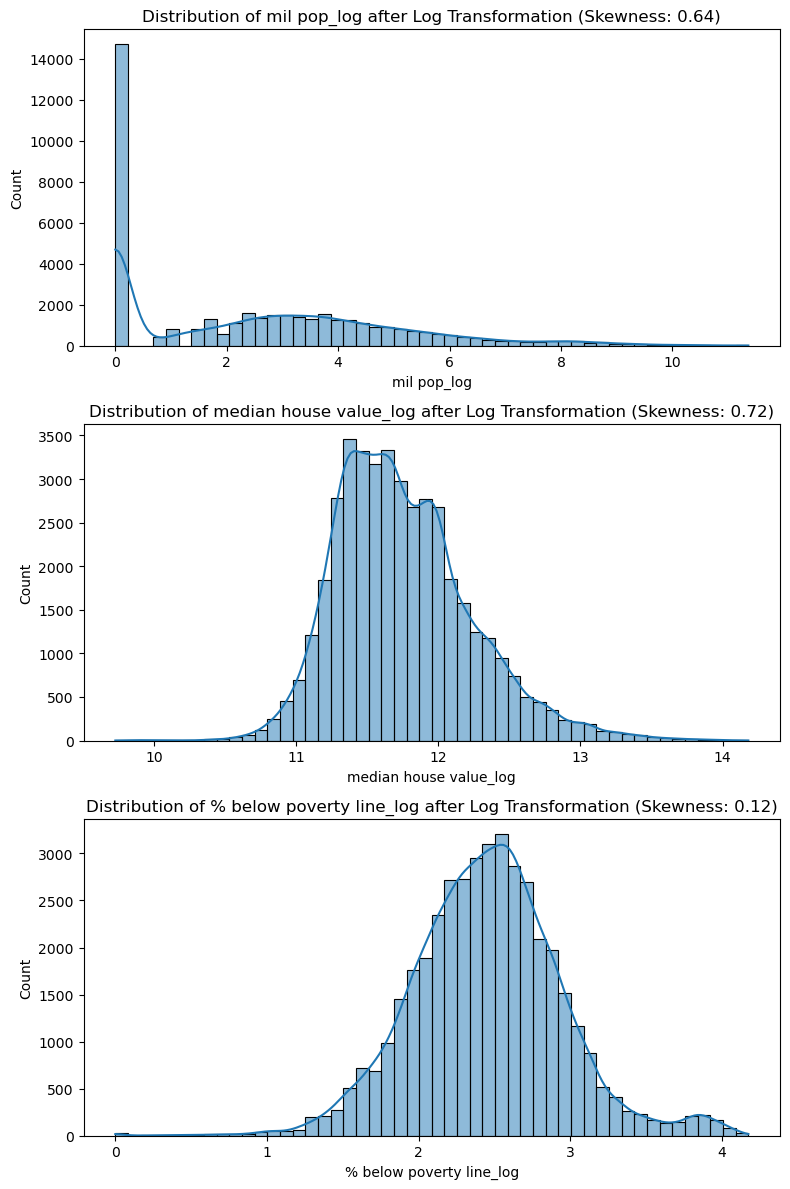

In [14]:
# Apply log transformation to reduce skewness in highly skewed features
df['mil pop_log'] = np.log1p(df['mil pop'])
df['median house value_log'] = np.log1p(df['median house value'])
df['% below poverty line_log'] = np.log1p(df['% below poverty line'])

# Plot distributions after log transformation
log_transformed_cols = ['mil pop_log', 'median house value_log', '% below poverty line_log']
fig, axes = plt.subplots(len(log_transformed_cols), 1, figsize=(8, 12))

for i, col in enumerate(log_transformed_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} after Log Transformation (Skewness: {df[col].skew():.2f})")

plt.tight_layout()
plt.show()

# Display updated skewness values
log_skewness = df[log_transformed_cols].skew().to_frame(name="Skewness After Log Transformation")


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select features for scaling (log-transformed where applicable)
features_to_scale = ["mil pop_log", "median income", "median house value_log", "% below poverty line_log", "unemployment %"]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df[features_to_scale]), columns=features_to_scale)

pd.options.display.float_format = '{:.2f}'.format

In [18]:
df_scaled.describe()

,mil pop_log,median income,median house value_log,% below poverty line_log,unemployment %
count,41837.00,41837.00,41837.00,41837.00,41837.00
mean,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.05,-2.59,-4.23,-4.95,-1.78
25%,-1.05,-0.63,-0.73,-0.63,-0.66
50%,-0.02,-0.13,-0.13,-0.00,-0.19
75%,0.66,0.47,0.56,0.60,0.46
max,3.69,8.02,5.06,3.48,8.40


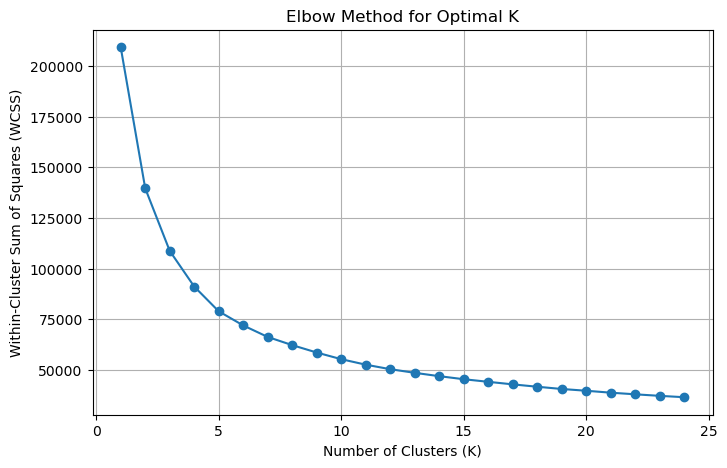

In [21]:
from sklearn.cluster import KMeans
import numpy as np

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

# Trying different values of K (number of clusters)
K_range = range(1, 25)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()


In [22]:
# Preserve the "NAME" column before scaling
df_scaled = df[["NAME"]].copy()  # Keep county names

# Select numerical features for scaling
features_to_scale = ["mil pop_log", "median income", "median house value_log", "% below poverty line_log", "unemployment %"]

# Apply standard scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_to_scale])

# Add scaled features back to df_scaled
df_scaled[features_to_scale] = scaled_features

# Run K-Means clustering with K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(scaled_features)




In [23]:
df_scaled

,NAME,mil pop_log,median income,median house value_log,% below poverty line_log,unemployment %,Cluster
0,"Comerío Municipio, Puerto Rico",0.05,-2.43,-0.94,3.15,0.73,4
1,"Guánica Municipio, Puerto Rico",0.48,-2.50,-1.11,3.32,6.58,4
2,"Clarke County, Georgia",1.02,-1.01,0.49,0.84,-0.16,3
3,"Clay County, Georgia",-1.05,-1.54,-1.62,1.66,3.32,4
4,"Clayton County, Georgia",1.72,-0.41,0.01,0.46,1.48,3
...,...,...,...,...,...,...,...
41832,"Vega Baja Municipio, Puerto Rico",0.20,-1.71,-0.20,2.46,2.28,4
41833,"Vieques Municipio, Puerto Rico",-1.05,-2.15,-0.22,2.95,1.48,4
41834,"Villalba Municipio, Puerto Rico",0.20,-1.79,-0.47,2.52,1.68,4
41835,"Yabucoa Municipio, Puerto Rico",0.39,-1.96,-0.64,2.77,0.98,4


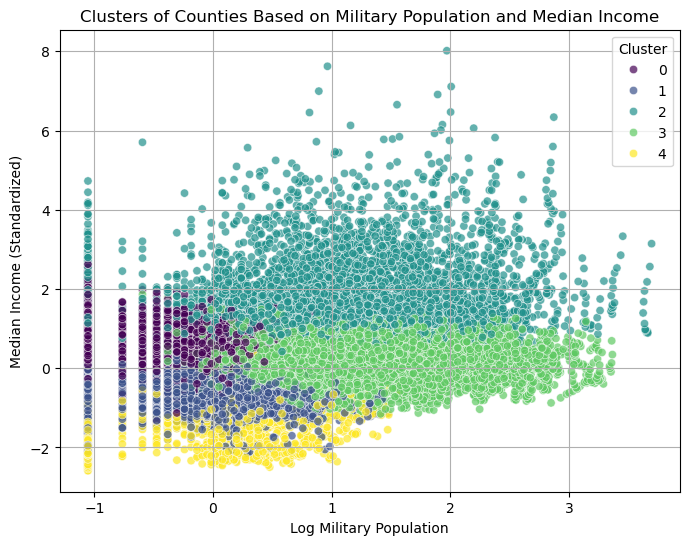

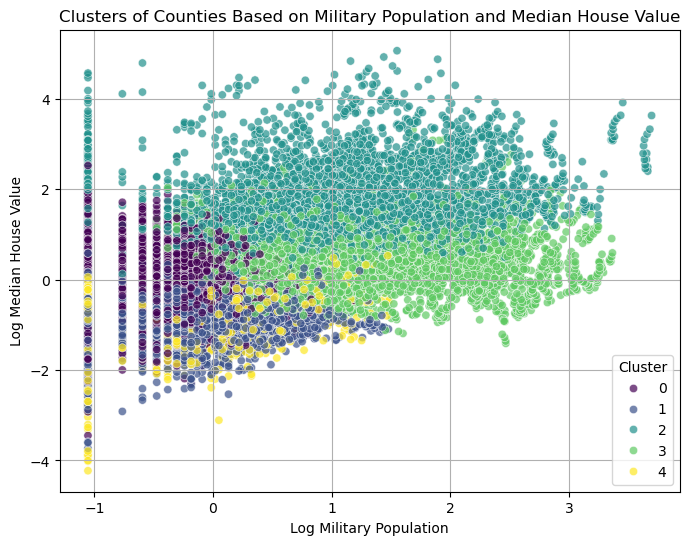

In [24]:
import seaborn as sns

# Scatter plot for Military Population vs. Median Income with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["mil pop_log"], y=df_scaled["median income"], hue=df_scaled["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Log Military Population")
plt.ylabel("Median Income (Standardized)")
plt.title("Clusters of Counties Based on Military Population and Median Income")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Scatter plot for Military Population vs. Median House Value with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["mil pop_log"], y=df_scaled["median house value_log"], hue=df_scaled["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Log Military Population")
plt.ylabel("Log Median House Value")
plt.title("Clusters of Counties Based on Military Population and Median House Value")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


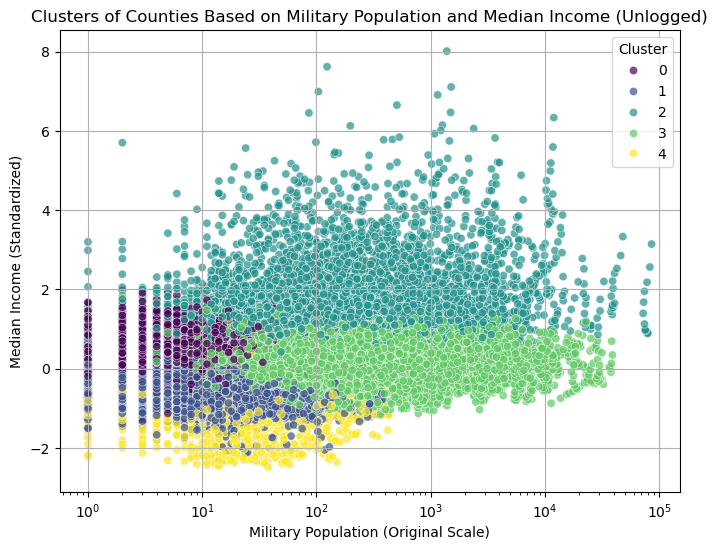

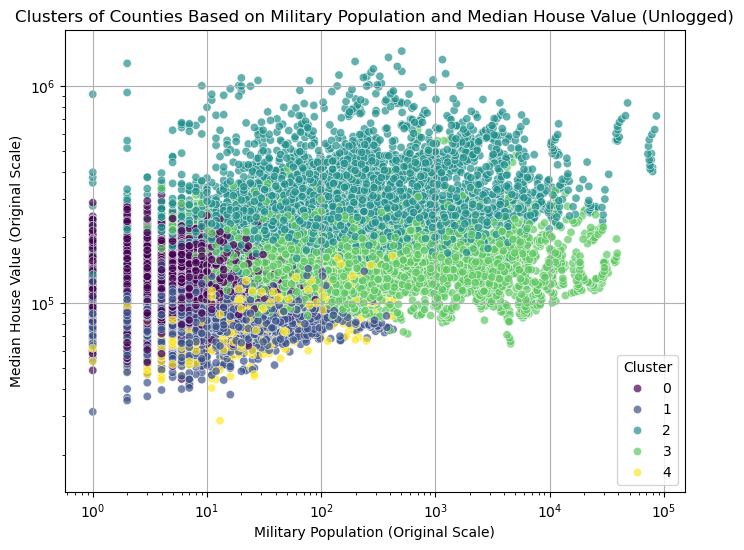

In [25]:
# Recreate the scaled DataFrame with the "NAME" column included
df_scaled = df[["NAME"]].copy()  # Preserve county names

# Select numerical features for scaling
features_to_scale = ["mil pop_log", "median income", "median house value_log", "% below poverty line_log", "unemployment %"]

# Apply standard scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_to_scale])

# Add scaled features back to df_scaled
df_scaled[features_to_scale] = scaled_features

# Run K-Means clustering with K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(scaled_features)

# Reverse log transformation to get original scale values for visualization
df_scaled["mil pop_unlog"] = np.expm1(df["mil pop_log"])
df_scaled["median house value_unlog"] = np.expm1(df["median house value_log"])

# Scatter plot for Military Population vs. Median Income with clusters (Unlogged)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["mil pop_unlog"], y=df_scaled["median income"], hue=df_scaled["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Military Population (Original Scale)")
plt.ylabel("Median Income (Standardized)")
plt.title("Clusters of Counties Based on Military Population and Median Income (Unlogged)")
plt.legend(title="Cluster")
plt.grid(True)
plt.xscale("log")  # Log scale for better visualization
plt.show()

# Scatter plot for Military Population vs. Median House Value with clusters (Unlogged)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["mil pop_unlog"], y=df_scaled["median house value_unlog"], hue=df_scaled["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Military Population (Original Scale)")
plt.ylabel("Median House Value (Original Scale)")
plt.title("Clusters of Counties Based on Military Population and Median House Value (Unlogged)")
plt.legend(title="Cluster")
plt.grid(True)
plt.xscale("log")  # Log scale for better visualization
plt.yscale("log")  # Log scale for better visualization
plt.show()



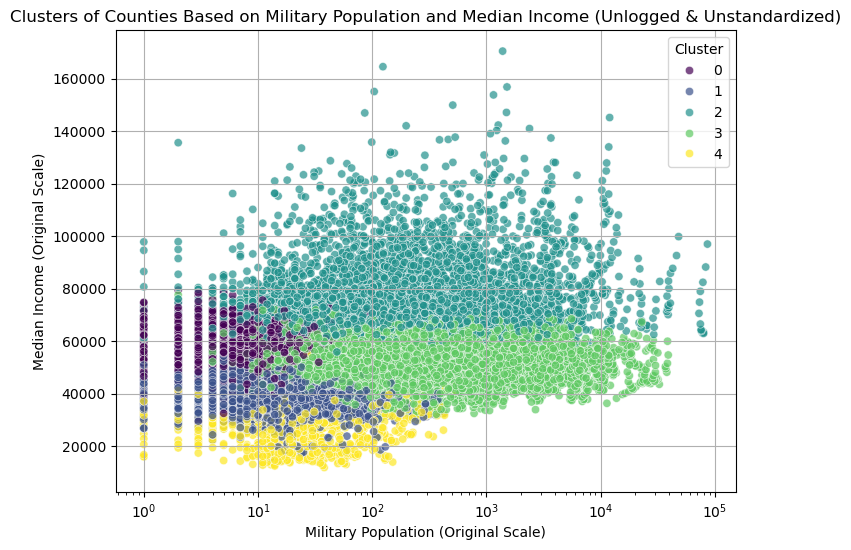

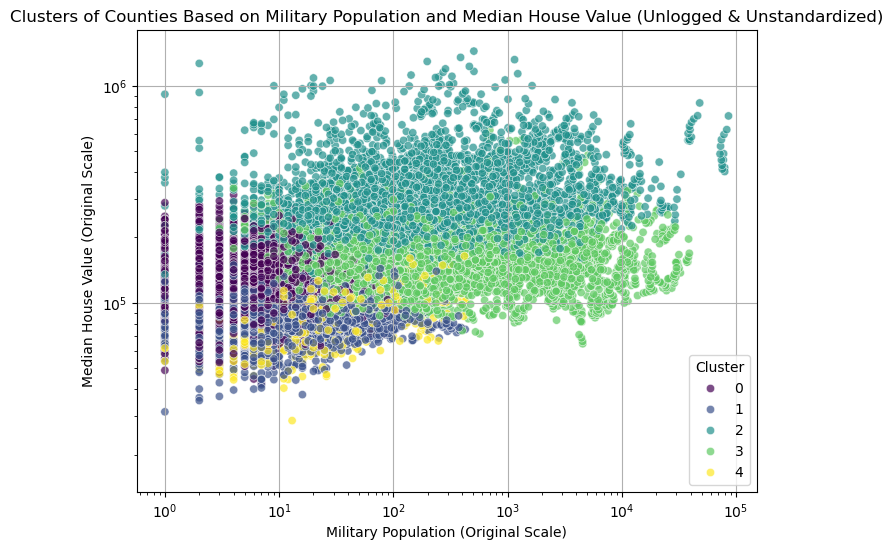

NameError: name 'tools' is not defined

In [26]:
# Reverse standardization for median income using original mean and std from StandardScaler
df_scaled["median income_unscaled"] = (df_scaled["median income"] * scaler.scale_[features_to_scale.index("median income")]) + scaler.mean_[features_to_scale.index("median income")]

# Scatter plot for Military Population vs. Median Income with clusters (Unlogged and Unstandardized)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["mil pop_unlog"], y=df_scaled["median income_unscaled"], hue=df_scaled["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Military Population (Original Scale)")
plt.ylabel("Median Income (Original Scale)")
plt.title("Clusters of Counties Based on Military Population and Median Income (Unlogged & Unstandardized)")
plt.legend(title="Cluster")
plt.grid(True)
plt.xscale("log")  # Log scale for better visualization
plt.show()

# Scatter plot for Military Population vs. Median House Value with clusters (Unlogged and Unstandardized)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["mil pop_unlog"], y=df_scaled["median house value_unlog"], hue=df_scaled["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Military Population (Original Scale)")
plt.ylabel("Median House Value (Original Scale)")
plt.title("Clusters of Counties Based on Military Population and Median House Value (Unlogged & Unstandardized)")
plt.legend(title="Cluster")
plt.grid(True)
plt.xscale("log")  # Log scale for better visualization
plt.yscale("log")  # Log scale for better visualization
plt.show()

# Display the clustered counties with untransformed values
tools.display_dataframe_to_user(
    name="Clustered Counties with Original Values",
    dataframe=df_scaled[["NAME", "Cluster", "mil pop_unlog", "median income_unscaled", "median house value_unlog"]]
)


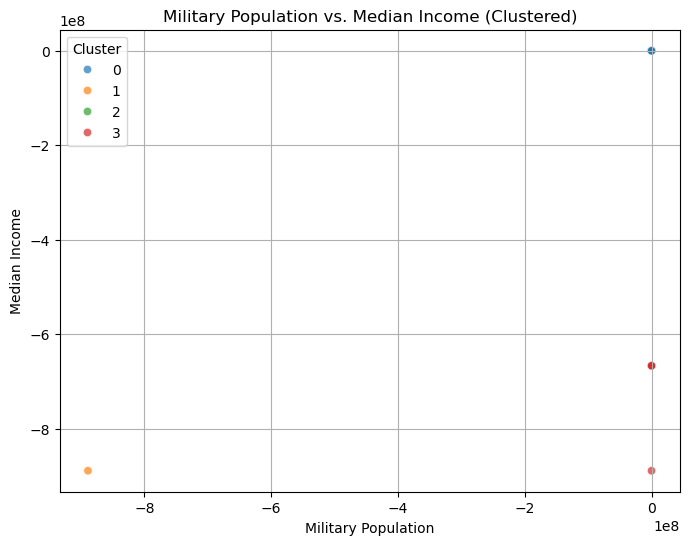

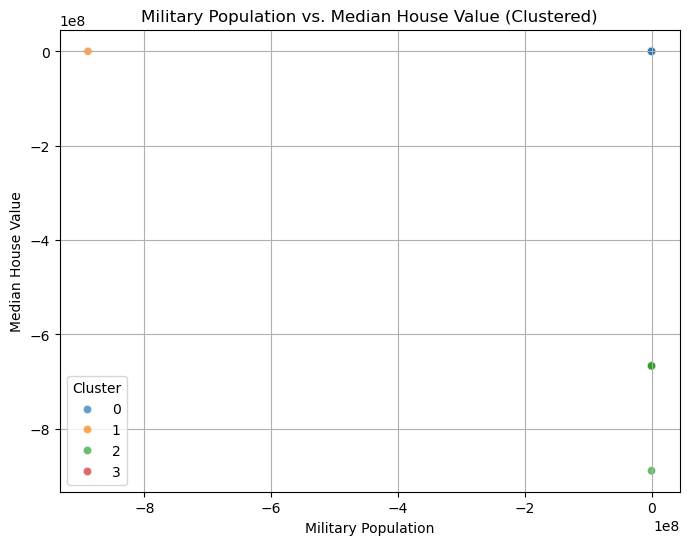

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract necessary columns
features = ["mil pop", "median income", "median house value", "Cluster"]

# Ensure proper scaling for visualization
df_scaled = df[features].dropna()

# Plot 1: Military Population vs. Median Income
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x="mil pop", y="median income", hue="Cluster", palette="tab10", alpha=0.7)
plt.xlabel("Military Population")
plt.ylabel("Median Income")
plt.title("Military Population vs. Median Income (Clustered)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Plot 2: Military Population vs. Median House Value
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x="mil pop", y="median house value", hue="Cluster", palette="tab10", alpha=0.7)
plt.xlabel("Military Population")
plt.ylabel("Median House Value")
plt.title("Military Population vs. Median House Value (Clustered)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [7]:
df

,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,NAME,state,county,county_name,state_name,Year,Cluster
0,16.0,(X),50181.0,87.0,498.0,3.8,(X),145300.0,"Jefferson County, Idaho",16,51,Jefferson County,Idaho,2009,0
1,13.0,(X),40322.0,47.0,663.0,4.7,(X),130600.0,"Jerome County, Idaho",16,53,Jerome County,Idaho,2009,0
2,12.0,(X),45446.0,1072.0,6212.0,3.5,(X),213000.0,"Kootenai County, Idaho",16,55,Kootenai County,Idaho,2009,0
3,29.0,(X),36448.0,196.0,1050.0,5.4,(X),173200.0,"Latah County, Idaho",16,57,Latah County,Idaho,2009,0
4,0.0,(X),38750.0,69.0,1136.0,8.5,(X),171400.0,"Lemhi County, Idaho",16,59,Lemhi County,Idaho,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45084,19.0,16.3,37287.0,23701.0,5108.0,9.2,38.2,115900.0,"Vega Baja Municipio, Puerto Rico",72,145,Vega Baja Municipio,Puerto Rico,2022,0
45085,0.0,13.1,21821.0,17062.0,2462.0,19.6,49.0,114500.0,"Vieques Municipio, Puerto Rico",72,147,Vieques Municipio,Puerto Rico,2022,0
45086,19.0,13.9,33109.0,22461.0,1527.0,0.8,39.4,101900.0,"Villalba Municipio, Puerto Rico",72,149,Villalba Municipio,Puerto Rico,2022,0
45087,31.0,11.1,27239.0,19972.0,2616.0,1.5,44.8,93900.0,"Yabucoa Municipio, Puerto Rico",72,151,Yabucoa Municipio,Puerto Rico,2022,0
